In [33]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.12.0


In [34]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [35]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [36]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [37]:
x_train[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Support Vector Machine

#import pandas as pd
#import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Create an object svmModel by calling a method SVC()
svmModel = SVC(kernel = 'rbf',C = 2, gamma = 0.9)

# Train the model by calling a method fit()
svmModel.fit(x_train,y_train)

# Store the predicted values into y_pred
Y_pred = svmModel.predict(x_test)

# Display the accuracy upto 2 decimal places
print('Accuracy in SVC = ', round(accuracy_score(y_test, Y_pred)*100,2))

x_train_flat=[ x_train[i].flatten() for i in x_train]

x_train_flat.shape

x_train[100].flatten()

## Forward propogation ANN

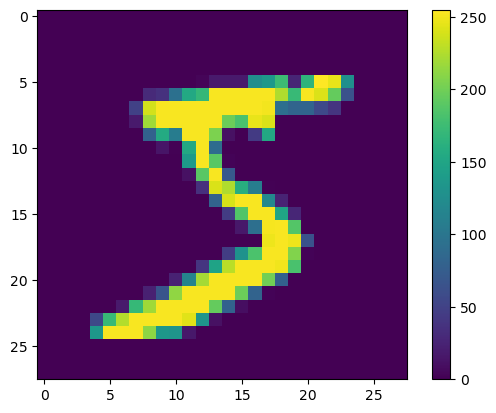

In [38]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [39]:
# scale

x_train = x_train / 255.0
x_test = x_test / 225.0

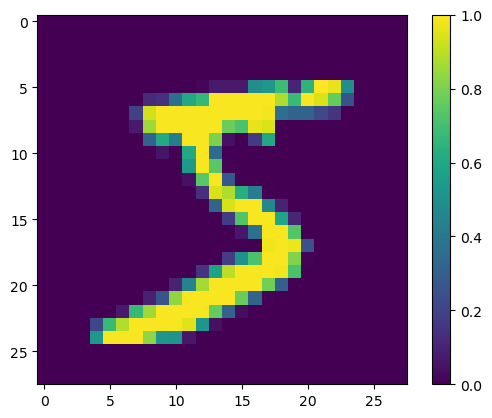

In [40]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

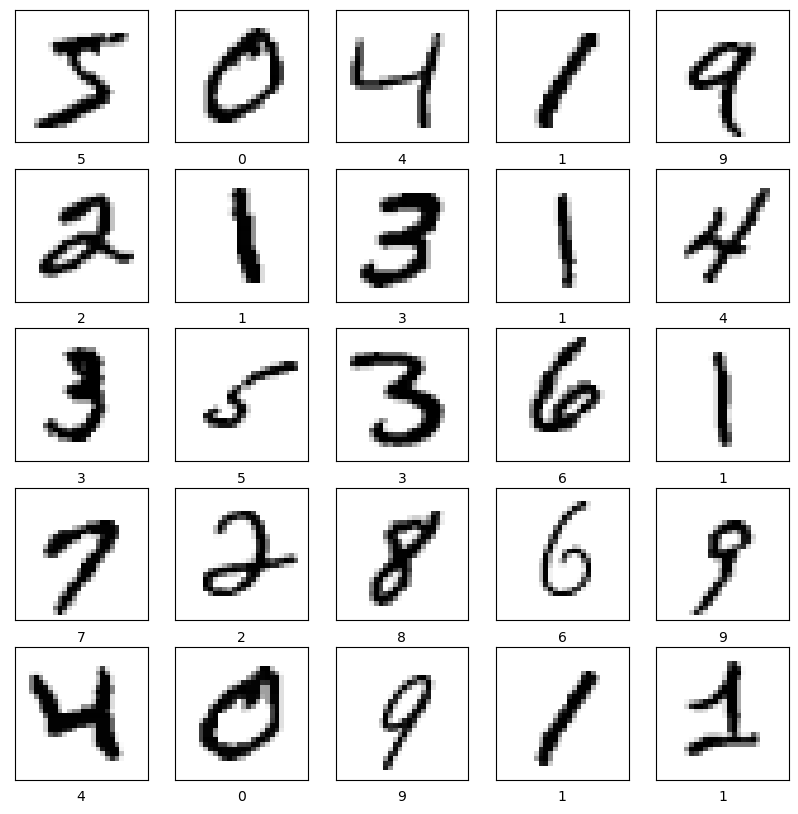

In [41]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.1269 - val_accuracy: 0.9763
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.1347 - val_accuracy: 0.9771
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.1331 - val_accuracy: 0.9785
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.1307 - val_accuracy: 0.9771
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.1242 - val_accuracy: 0.9802
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.1226 - val_accuracy: 0.9796
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.1466 - val_accuracy:

In [52]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1548 - accuracy: 0.9791 - 339ms/epoch - 1ms/step

Test accuracy: 0.9790999889373779


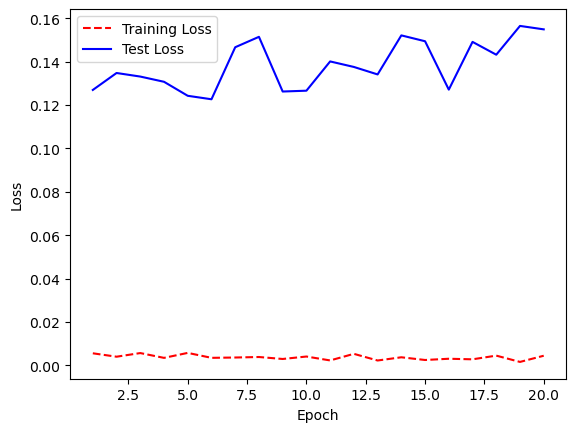

In [53]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

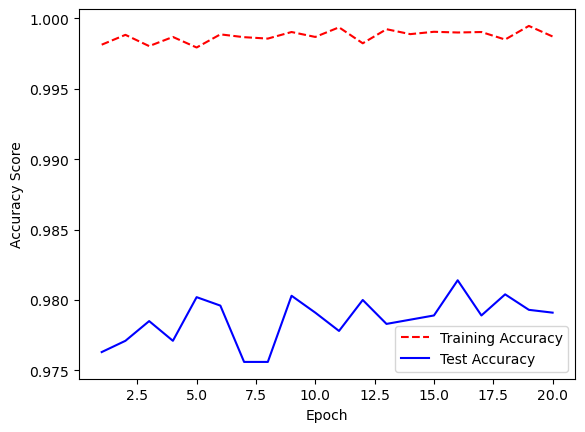

In [54]:
# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

In [57]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2290 - accuracy: 0.9324 - val_loss: 0.1113 - val_accuracy: 0.9673
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0976 - accuracy: 0.9702 - val_loss: 0.0937 - val_accuracy: 0.9713
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0677 - accuracy: 0.9789 - val_loss: 0.0895 - val_accuracy: 0.9721
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0515 - accuracy: 0.9835 - val_loss: 0.0805 - val_accuracy: 0.9759
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0404 - accuracy: 0.9868 - val_loss: 0.0851 - val_accuracy: 0.9769
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0328 - accuracy: 0.9893 - val_loss: 0.0966 - val_accuracy: 0.9755
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0289 - accuracy: 0.9903 - val_loss: 0.0833 - val_accuracy:

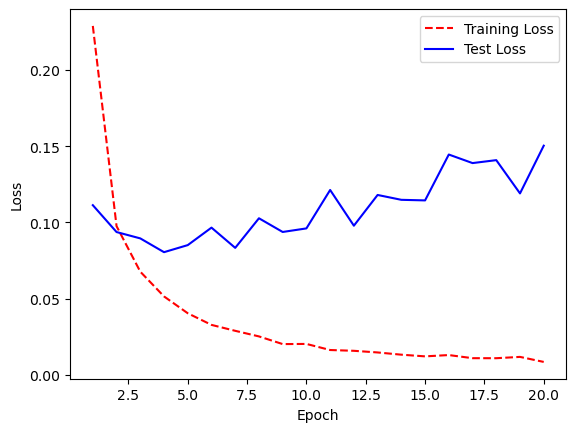

In [60]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

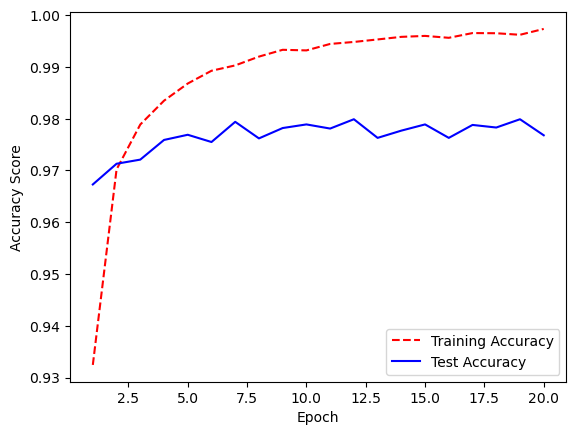

In [61]:
# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

In [62]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [63]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [64]:
predictions[0]

array([3.0942327e-14, 2.2297882e-15, 3.2192287e-11, 3.6061000e-08,
       2.7270068e-22, 1.7010200e-13, 9.7077870e-26, 1.0000000e+00,
       1.5850072e-14, 2.9154987e-09], dtype=float32)

In [65]:
np.argmax(predictions[0])

7

In [66]:
y_test[0]

7

In [67]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


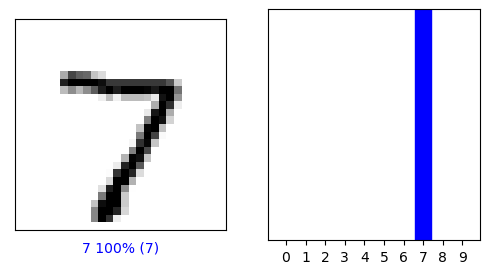

In [68]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


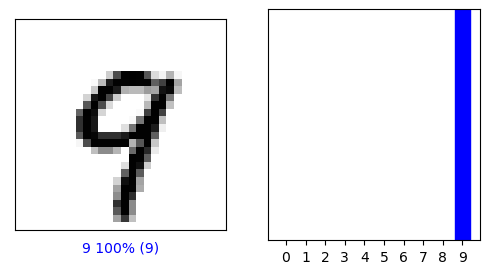

In [69]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


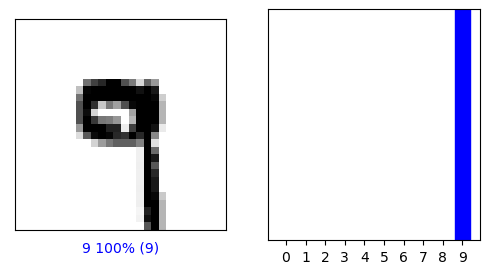

In [70]:
i = 6000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


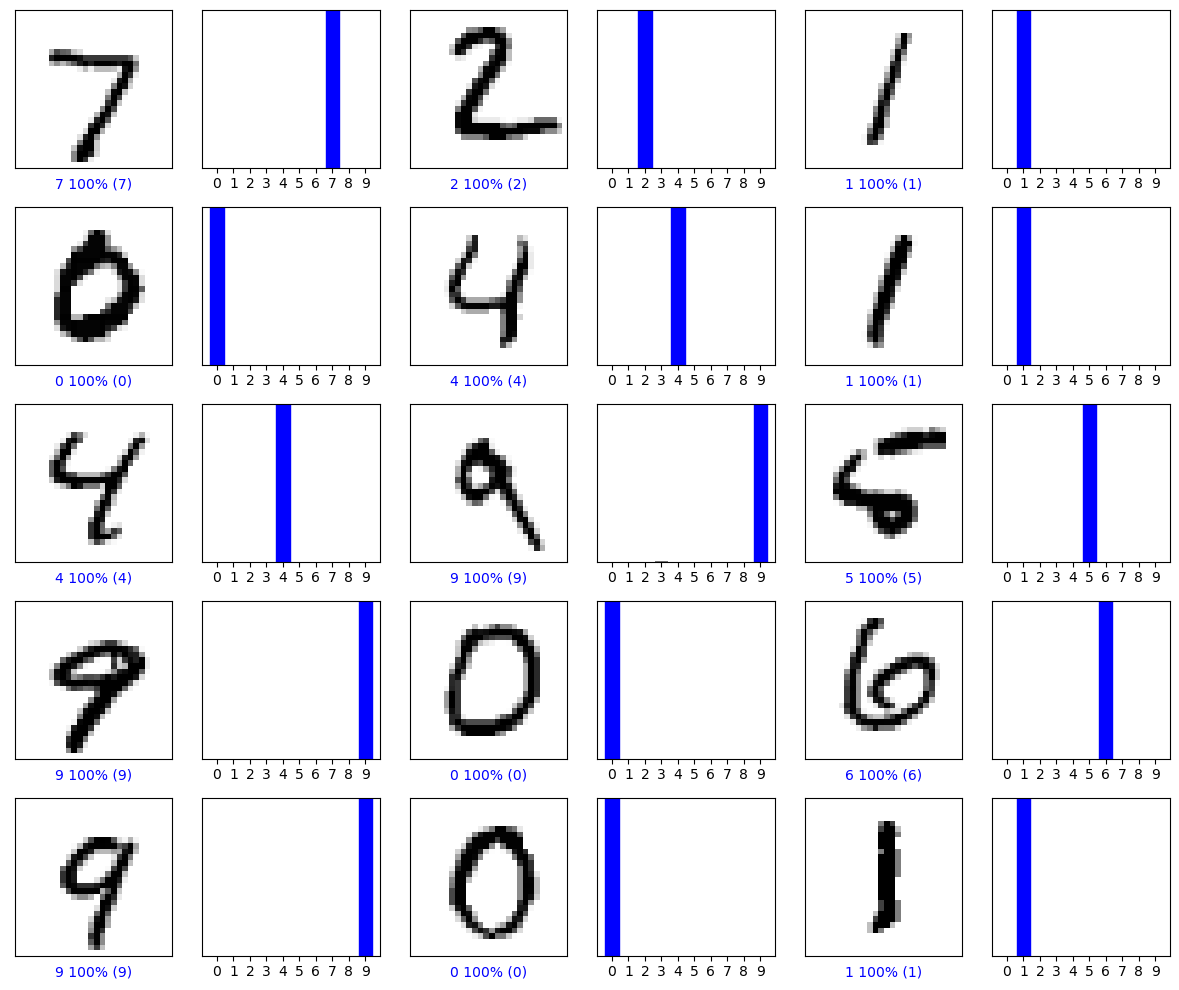

In [71]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()


In [72]:
# Grab an image from the test dataset.
img = x_test[1]

print(img.shape)

(28, 28)


In [73]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [74]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 31ms/step
[[7.1681928e-31 3.6813102e-22 1.0000000e+00 1.1524161e-23 6.8489501e-37
  6.0946243e-38 7.6368497e-31 1.5428375e-32 5.0853537e-32 0.0000000e+00]]


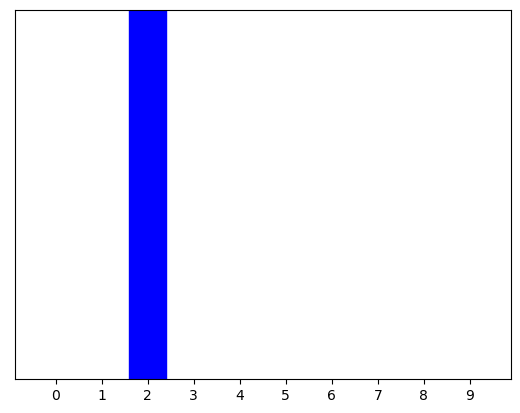

In [75]:
plot_value_array(1, predictions_single[0], y_test)


In [76]:
np.argmax(predictions_single[0])

2

# CNN

In [90]:
model = keras.Sequential([
    keras.layers.Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(1,1)),
# flatten output of conv
    keras.layers.Flatten(),
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [91]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 30s 63ms/step - loss: 0.1878 - accuracy: 0.9453 - val_loss: 0.0680 - val_accuracy: 0.9777
Epoch 2/10
469/469 [==============================] - 29s 63ms/step - loss: 0.0574 - accuracy: 0.9826 - val_loss: 0.0584 - val_accuracy: 0.9809
Epoch 3/10
469/469 [==============================] - 29s 63ms/step - loss: 0.0337 - accuracy: 0.9899 - val_loss: 0.0570 - val_accuracy: 0.9826
Epoch 4/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0613 - val_accuracy: 0.9818
Epoch 5/10
469/469 [==============================] - 32s 68ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0513 - val_accuracy: 0.9851
Epoch 6/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0519 - val_accuracy: 0.9858
Epoch 7/10
469/469 [==============================] - 31s 65ms/step - loss: 0.0067 - accuracy: 0.9983 - val_loss: 0.0642 - val_accuracy:

In [93]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0822 - accuracy: 0.9821 - 2s/epoch - 5ms/step

Test accuracy: 0.9821000099182129


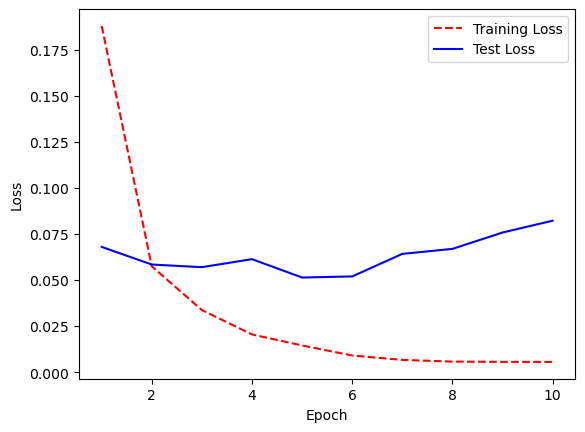

In [94]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

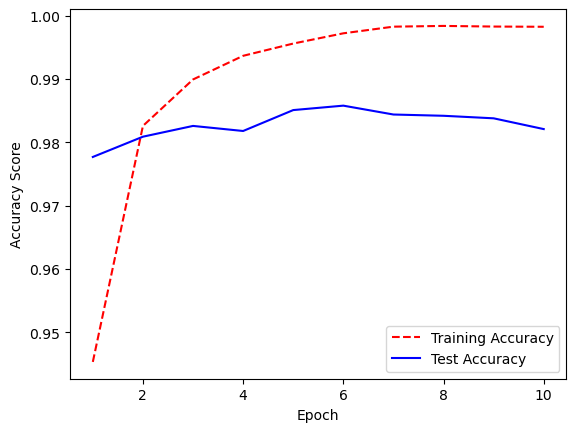

In [95]:
# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();